# Problem
- Shopify has 100 sneaker shops
- Each shop sells a unique shoe
- Want to calculate an average order value
- Timeframe is 30 days

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [71]:
# Import
df = pd.read_excel("2019 Winter Data Science Intern Challenge Data Set.xlsx")

In [108]:
# Check for NA's
df.isna().sum()

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64

In [130]:
# Metrics per shop
shops = df.groupby(by = df["shop_id"]).sum()[['order_amount', 'total_items']]
shops.head(2)

,order_amount,total_items
shop_id,,
1,13588,86
2,9588,102


In [131]:
shops['order_count'] = df['shop_id'].value_counts()

In [132]:
shops['AOV'] = shops['order_amount'] / shops['order_count']
shops

,order_amount,total_items,order_count,AOV
shop_id,,,,
1,13588,86,44,308.818182
2,9588,102,55,174.327273
3,14652,99,48,305.250000
4,13184,103,51,258.509804
5,13064,92,45,290.311111
...,...,...,...,...
96,16830,110,51,330.000000
97,15552,96,48,324.000000
98,14231,107,58,245.362069


In [135]:
# Average AOV per shop
shops['AOV'].mean()

3136.834087887025

In [142]:
shops.sort_values(by = 'AOV', ascending = False)

,order_amount,total_items,order_count,AOV
shop_id,,,,
42,11990176,34063,51,235101.490196
78,2263800,88,46,49213.043478
50,17756,92,44,403.545455
90,19758,111,49,403.224490
38,13680,72,35,390.857143
...,...,...,...,...
53,14560,130,68,214.117647
100,8547,77,40,213.675000
32,7979,79,42,189.976190


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AOV'>

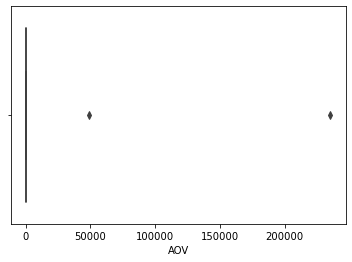

In [138]:
# Check for outliers 
sns.boxplot(shops['AOV'])

In [161]:
shops.loc[78]

KeyError: 78

In [ ]:
# Drop shop_id 42 and 78
shops.drop(42, inplace = True)

No need to use statical method to determine how we should handle the outliers. The outliers should be removed as the AOV is enormously larger than the other shops.

In [159]:
shops.drop(78, inplace = True)

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AOV'>

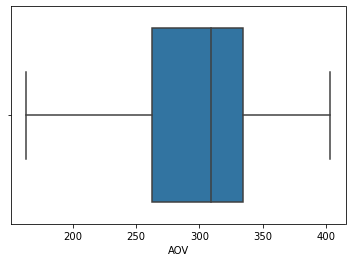

In [162]:
sns.boxplot(shops['AOV'])

In [164]:
# AOV after removal of outliers
shops['AOV'].mean()

299.68239912615485

# Answers to Question 1
a) The AOV metric involves calculting revenues and number of orders. Here, there were two outliers in which the AOV was much higher than the other stores. There are many possible factors to this, such as the type of store (luxury, retailer, etc.). 

As an example, A luxury shoe store may have a much lower number of orders, but can have the same revenue to the other shoe stores due to the expensive price of an individual shoe. Thus, their AOV shall be higher.


Overall, going one level furthur are grouping similiar shoes stores into categories based on a set of variables (revenue, number of orders per year) shall make the data more useful to evaluate.

b) The AOV metric is still suitable to be reported, however should be reported per category. As explained in a), shoe stores should be split into different categories, such as luxury, retail, etc. As a result, the revenues and # of orders should be more similiar in nature. Thus, the AOV as a metric will be more comparable and useful

c) Here, with the removal of outliers, the AOV is ~$300